In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ParsedSurveyData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   program                                            344 non-null    object 
 1   residence                                          344 non-null    object 
 2   rating                                             344 non-null    float64
 3   residence_Claudette Millar Hall (CMH)              344 non-null    int64  
 4   residence_Columbia Lake Village South (CLV-South)  344 non-null    int64  
 5   residence_Mackenzie King Village (MKV)             344 non-null    int64  
 6   residence_Ron Eydt Village (REV)                   344 non-null    int64  
 7   residence_UW Place (UWP)                           344 non-null    int64  
 8   residence_Village 1                                344 non-null    int64  
 9   program_AF

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.50      0.67      0.57         3
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         0
         8.0       1.00      0.25      0.40         4
         9.0       0.43      1.00      0.60         3
        10.0       0.00      0.00      0.00         1

    accuracy                           0.43        14
   macro avg       0.24      0.24      0.20        14
weighted avg       0.48      0.43      0.37        14

              precision    recall  f1-score   support

         1.0       0.25      1.00      0.40         1
         2.0       1.00      0.33      0.50         3
         3.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1
         9.0       0.67      0.67      0.67         3
        10.0       1.00 

/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score ar

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         7.0       0.50      0.25      0.33         4
         8.0       0.50      0.25      0.33         4
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         1

    accuracy                           0.13        15
   macro avg       0.11      0.06      0.07        15
weighted avg       0.27      0.13      0.18        15



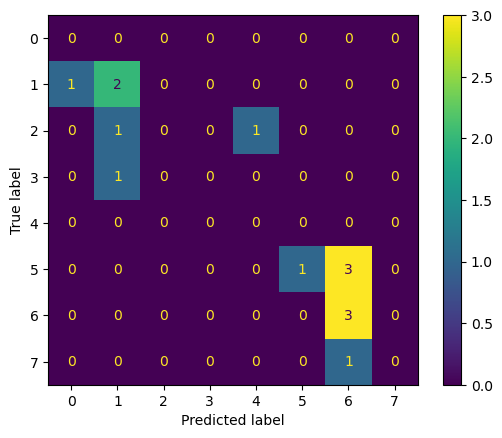

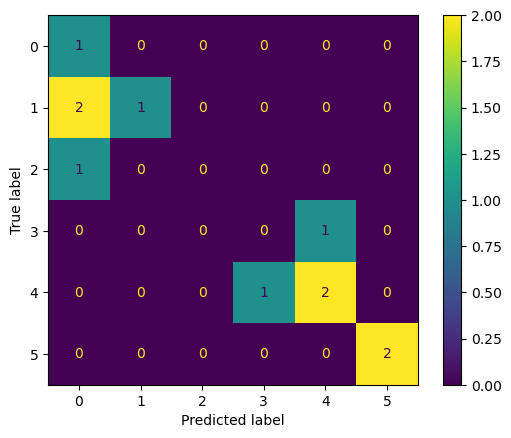

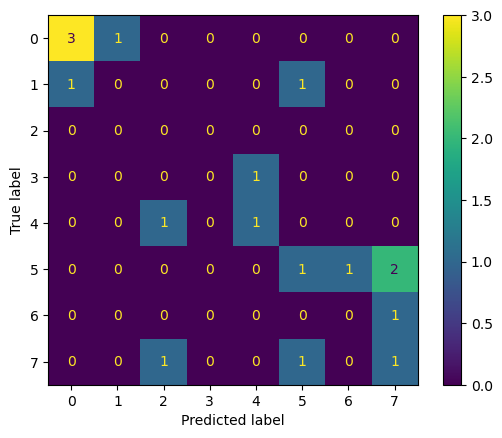

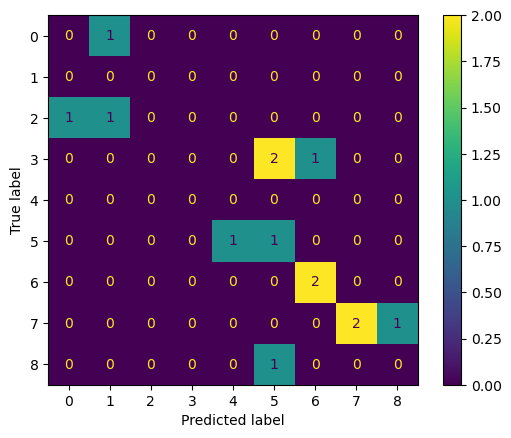

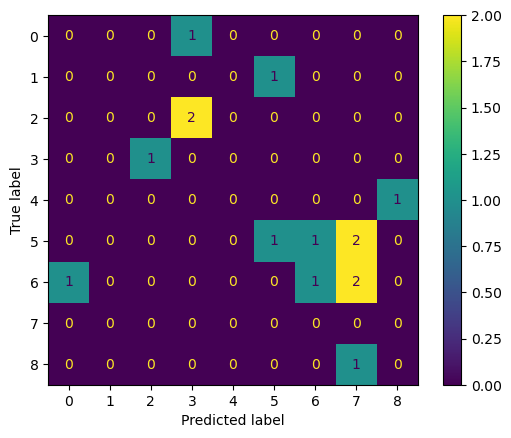

In [3]:
#Get all rows with specific residence
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


residence_list = ['residence_Claudette Millar Hall (CMH)', 
                  'residence_Mackenzie King Village (MKV)',
                  'residence_Ron Eydt Village (REV)', 
                  'residence_UW Place (UWP)', 
                  'residence_Village 1']

MSE_list = []
MAE_list = []

for residence in residence_list:
    residence_data = data[data[residence] == 1]
    X = residence_data[residence_data.columns[9:]]    
    y = residence_data['rating']
    
    
    #Fit Model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model_residence = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model_residence.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model_residence.predict(X_test)
    

    

    matrix = metrics.confusion_matrix(y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
    disp.plot()
    print(metrics.classification_report(y_test, y_pred))
